#### Were made 100 different searchs over the Berlin graph. For each search, each algorithm runs 10 times and in each run I restart the JVM, so we can assurer that no cach is used to give an advantage to any code. Then, I take the mean time for each algorithm and store on a csv file.

#### The elapsed time to generate this data was 9h 45min 22s

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import utils as ut
from IPython.display import display, HTML, Markdown

## Loading the times generated from tests

The Vanila algorithm is a implementation made by Erick

In [2]:
#ut.generateTimes(n_tests=10,operations=["BerlinVanila"],save_file="../vanila_test.csv")
df = ut.loadData()[["Distance(m)","BerlinVanila","BerlinGraphHopper","BerlinGraphast","BerlinNeo4j"]]
#df

## Analysing the times

### Mean time of the algorithms

In [3]:
df.mean()

Distance(m)          27177.540
BerlinVanila            88.237
BerlinGraphHopper      166.811
BerlinGraphast         502.021
BerlinNeo4j            546.270
dtype: float64

### Median of the times

In [4]:
df.median()

Distance(m)          26362.50
BerlinVanila            90.60
BerlinGraphHopper      175.25
BerlinGraphast         552.45
BerlinNeo4j            515.20
dtype: float64

### Standard Deviation

In [5]:
df.std()

Distance(m)          10254.714928
BerlinVanila            22.837541
BerlinGraphHopper       37.321245
BerlinGraphast         191.913549
BerlinNeo4j            218.349776
dtype: float64

### Time for each algorithm execute a search

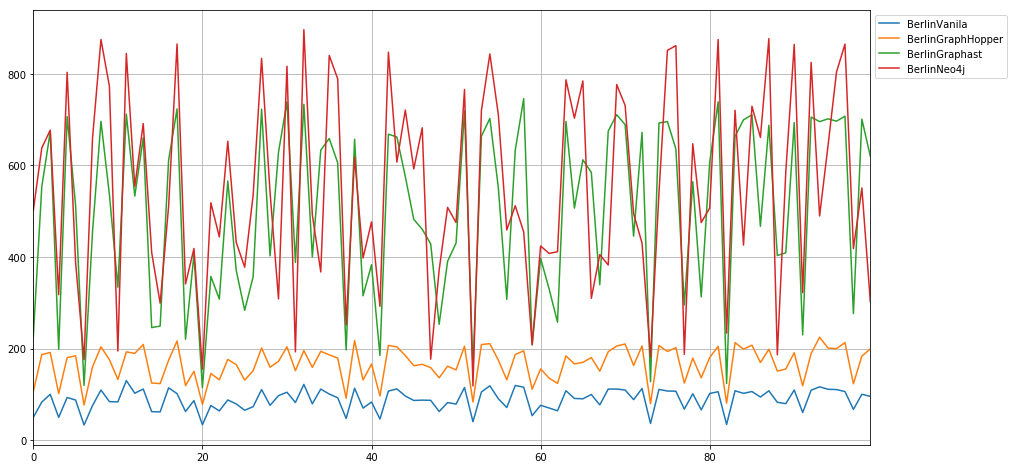

In [6]:
%config InlineBackend.figure_format = 'png'
distances = df.columns[1:]
#print(distances)
plot = df.loc[:,distances].plot(grid=True, figsize=(15,8)).legend(bbox_to_anchor=(1.0, 1))

### Histogram of the times

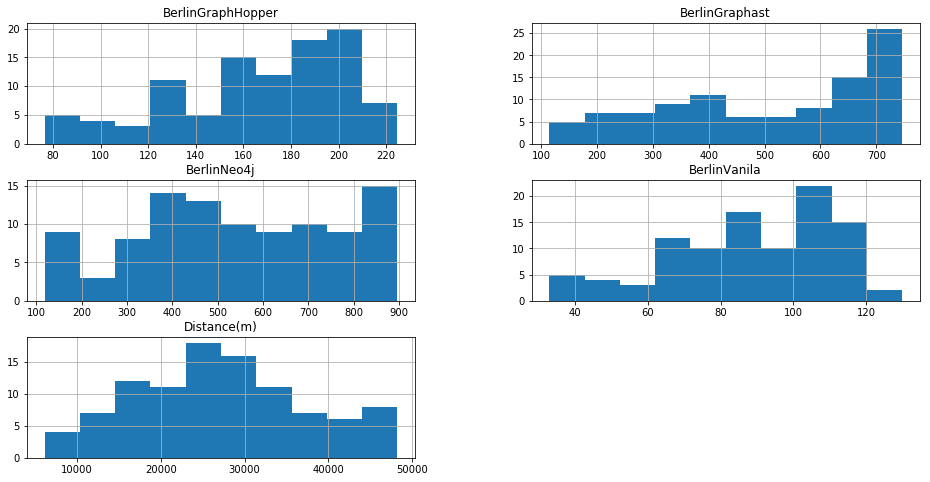

In [7]:
plot = df.hist(figsize=(16,8))

### The data
In red, we have the algorithm that has taken more time to execute the search and, in green, the fastest one

In [19]:
col = {c:c.replace("Berlin","") for c in df.columns if c!="Distance(m)"}
df.rename(columns=col,inplace=True)
df.sort_values("Distance(m)")
s = df.style.apply(ut.highlight_max,subset=list(col.keys()),axis=1)\
    .apply(ut.highlight_min,subset=list(col.keys()),axis=1)\
    .set_properties(**{'text-align': 'right'})
    
display(HTML(s.render()))

## Loading the memory used in the algorithms

In [10]:
memData = ut.loadMemoryData()

### Analysing general memory use

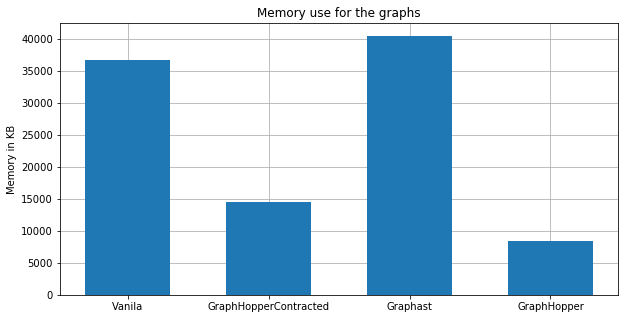

In [11]:
ut.plotMemoryUse(memData)

### Vanila memory used

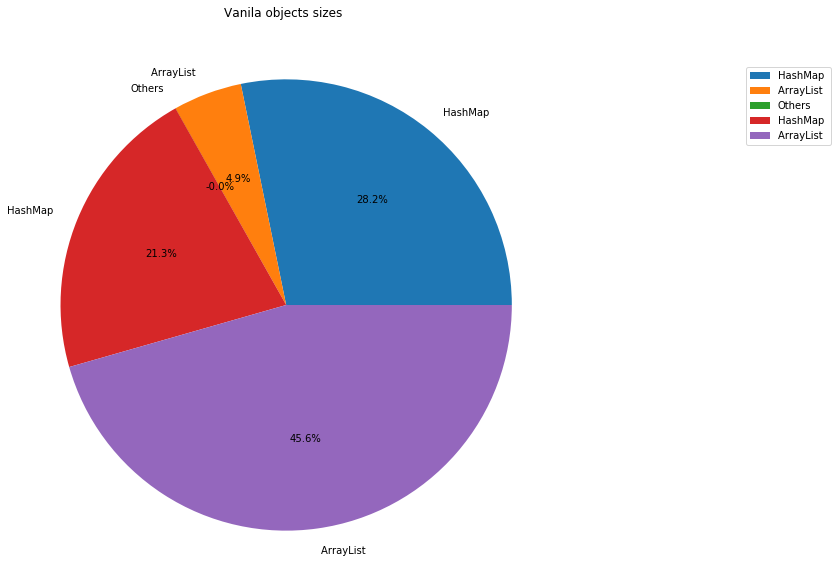

In [12]:
ut.plotPie(memData,"Vanila")    

### GraphHopper memory used

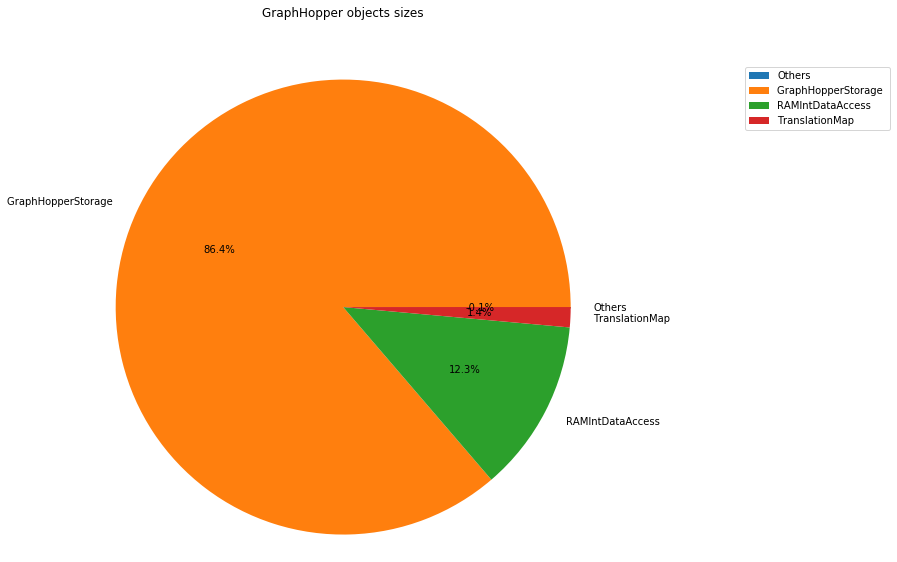

In [13]:
ut.plotPie(memData,"GraphHopper")

### GraphHopperContracted memory used

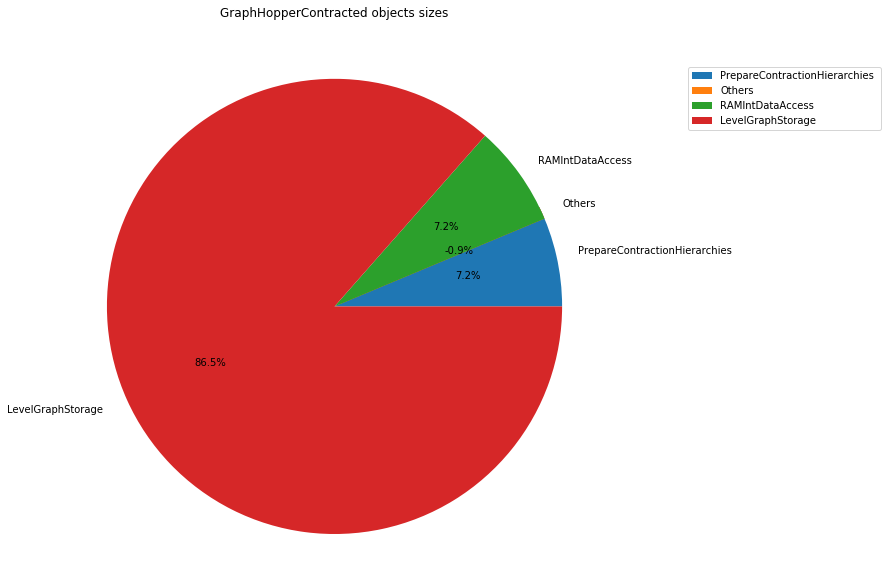

In [14]:
ut.plotPie(memData,"GraphHopperContracted")

### Graphast memory used

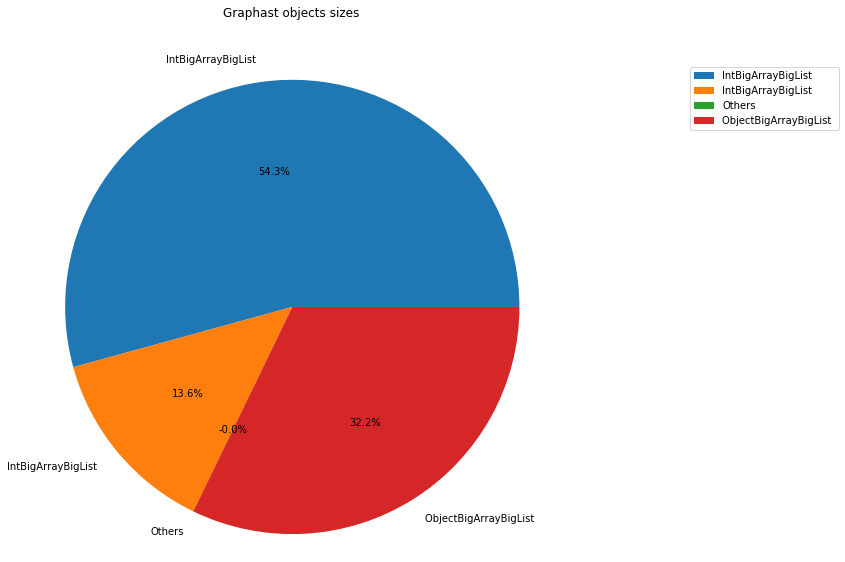

In [15]:
ut.plotPie(memData,"Graphast")

## Top 5 biggest classes from the algorithms:
#### VN - Vanila
#### GHC - GraphHopperContracted
#### GH - GraphHopper
#### GP - Graphast

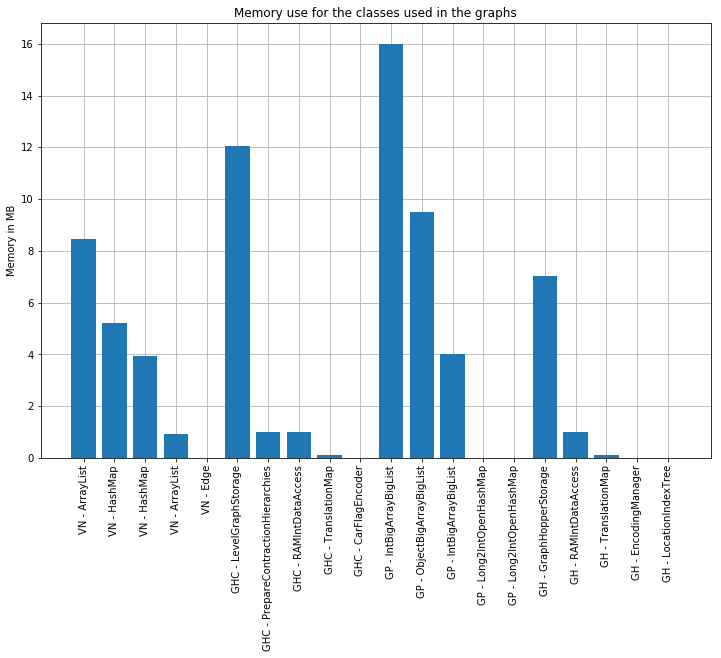

In [16]:
ut.plotTopMemoryClasses(memData)